In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
plt.rcParams['figure.figsize'] = 10,10
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [13]:
def process_csv_file(files):
    # Load the CSVs into a pandas DataFrame
    df = pd.concat((pd.read_csv(f, header=None, names=['ID', 'RMSD', 'z_increment', 'pert_num']) for f in files), ignore_index=True)
    
    # Calculate average RMSD
    avg_rmsd = df['RMSD'].mean()

    # Extract z_increment and pert_num
    z_increment = df['z_increment'].iloc[0]
    pert_num = df['pert_num'].iloc[0]

    return avg_rmsd, z_increment, pert_num

In [14]:
def process_directories(files):
    results = []
    avg_rmsd, z_increment, pert_num = process_csv_file(files)
    if avg_rmsd is not None:
        results.append([avg_rmsd, z_increment, pert_num])
    
    # Convert the results to a pandas DataFrame
    return pd.DataFrame(results, columns=['Average_RMSD', 'z_increment', 'pert_num'])

# Plot Data - triplicate Average RMSD

In [18]:
subdir, data = [], []
total = pd.DataFrame()
dir='/home/cadeniran/u1/amphiscan-pep-rot/results_grid.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    subdir.append(dir)
subdir.sort()

for i in subdir:
    path="/home/cadeniran/u1/amphiscan-pep-rot/"
    csv = "rmsd_values.csv"
    files = glob.glob(os.path.join(path,"results_grid.*/{}/".format(i),csv))
    data = process_directories(files)
    total = pd.concat([total,data], ignore_index=True)

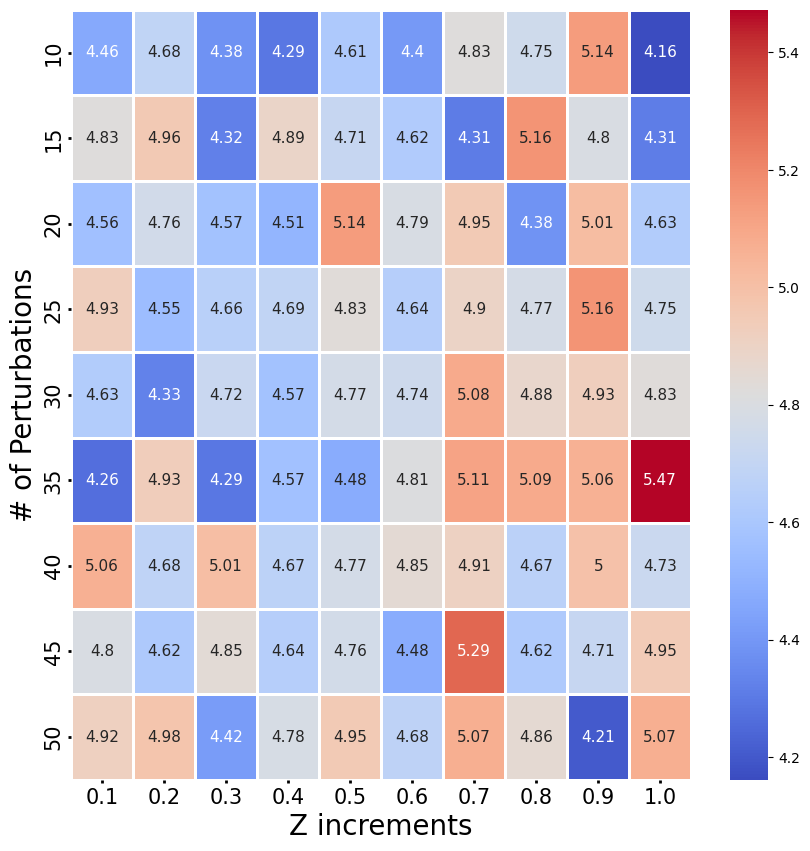

In [20]:
datamap = total.pivot(index="pert_num", columns="z_increment", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g')

plt.xlabel("Z increments", fontsize = 20)
plt.ylabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='both', labelsize='15', length=2, width=2)
plt.savefig("/home/cadeniran/ipn/figs/heatmaprotavg.png", format='png', transparent=True, bbox_inches='tight')

## Plot Data - triplicate lowest RMSD

In [21]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-rot/")

# Create lists
data, pdbid, pert_incre, rmsd, results = [], [], [], [], []
dir='/home/cadeniran/u1/amphiscan-pep-rot/results_grid.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for subdir in dirlist:
    pert_incre.append(subdir)
pert_incre.sort()

In [22]:
dir='/home/cadeniran/u1/amphiscan-pep-rot/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    pdbid.append(dir)
pdbid.sort()

In [23]:
# Load data in the DataFrames
for i in pert_incre:
    df = pd.DataFrame(columns=['ID', 'R.1', 'R.2', 'R.3'])
    df['ID'] = pdbid
    for j in range(1,4):
        rmsd=[]
        for p in pdbid:
            with open('results_grid.{}/{}/results/{}/txt/rmsd.txt'.format(j,i,p), 'r') as f:
                lines = f.read().splitlines()
                last_line = lines[-1]
                lastCol = last_line.split(sep=' ')[3]
                rmsd.append(lastCol)
        df['R.{}'.format(j)] = rmsd
    df['R.1'] = pd.to_numeric(df['R.1'])
    df['R.2'] = pd.to_numeric(df['R.2'])
    df['R.3'] = pd.to_numeric(df['R.3'])
    df['Lowest'] = df[['R.1','R.2','R.3']].min(axis=1)
    avg_rmsd = df['Lowest'].mean()
    pert_num = i.split(sep='_')[1]
    z_increment = i.split(sep='_')[0]
    results.append([avg_rmsd, z_increment, pert_num])
    data = pd.DataFrame(results, columns=['Average_RMSD', 'z_increment', 'pert_num'])

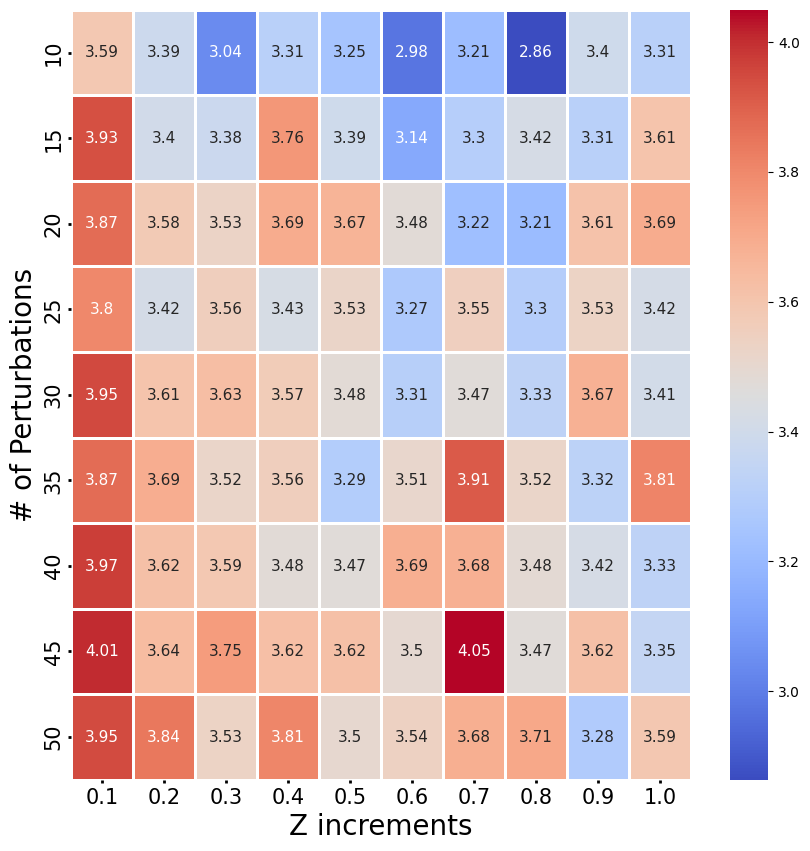

In [25]:
datamap = data.pivot(index="pert_num", columns="z_increment", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g')

plt.xlabel("Z increments", fontsize = 20)
plt.ylabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='both', labelsize='15', length=2, width=2)
plt.savefig("/home/cadeniran/ipn/figs/heatmaprotlowest.png", format='png', transparent=True, bbox_inches='tight')

## Plot Data - Extended RMSD (Avg)

In [193]:
os.chdir("/home/cadeniran/u1/amphiscan-pep-rot/")

subdir = ["0.1_10", "0.1_100", "0.1_105", "0.1_110", "0.1_115", "0.1_120", "0.1_125", "0.1_130", "0.1_135", "0.1_140", "0.1_145", "0.1_15", "0.1_150", "0.1_155", "0.1_160", "0.1_165", "0.1_170", "0.1_175", "0.1_180", "0.1_185", "0.1_190", "0.1_195", "0.1_20", "0.1_200", "0.1_25", "0.1_30", "0.1_35", "0.1_40", "0.1_45", "0.1_50", "0.1_55", "0.1_60", "0.1_65", "0.1_70", "0.1_75", "0.1_80", "0.1_85", "0.1_90", "0.1_95", "0.5_10", "0.5_100", "0.5_105", "0.5_110", "0.5_115", "0.5_120", "0.5_125", "0.5_130", "0.5_135", "0.5_140", "0.5_145", "0.5_15", "0.5_150", "0.5_155", "0.5_160", "0.5_165", "0.5_170", "0.5_175", "0.5_180", "0.5_185", "0.5_190", "0.5_195", "0.5_20", "0.5_200", "0.5_25", "0.5_30", "0.5_35", "0.5_40", "0.5_45", "0.5_50", "0.5_55", "0.5_60", "0.5_65", "0.5_70", "0.5_75", "0.5_80", "0.5_85", "0.5_90", "0.5_95", "1.0_10", "1.0_100", "1.0_105", "1.0_110", "1.0_115", "1.0_120", "1.0_125", "1.0_130", "1.0_135", "1.0_140", "1.0_145", "1.0_15", "1.0_150", "1.0_155", "1.0_160", "1.0_165", "1.0_170", "1.0_175", "1.0_180", "1.0_185", "1.0_190", "1.0_195", "1.0_20", "1.0_200", "1.0_25", "1.0_30", "1.0_35", "1.0_40", "1.0_45", "1.0_50", "1.0_55", "1.0_60", "1.0_65", "1.0_70", "1.0_75", "1.0_80", "1.0_85", "1.0_90", "1.0_95"]
subdir.sort()

In [194]:
data = []
total = pd.DataFrame()

for i in subdir:
    path="/home/cadeniran/u1/amphiscan-pep-rot/"
    csv = "rmsd_values.csv"
    files = glob.glob(os.path.join(path,"results_grid.*/{}/".format(i),csv))
    data = process_directories(files)
    total = pd.concat([total,data], ignore_index=True)
#total=total.sort_values(['z_increment', 'pert_num'], ascending=[True, True])

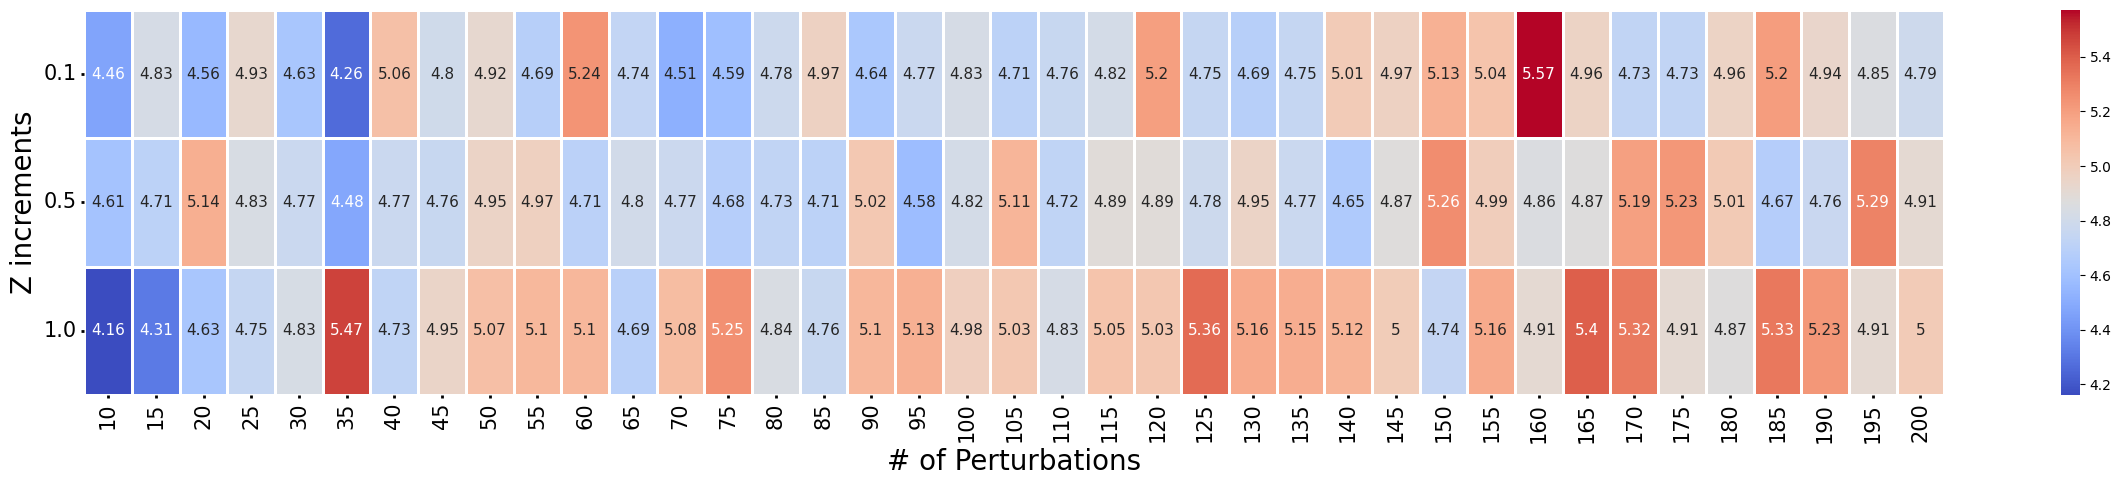

In [195]:
plt.rcParams['figure.figsize'] = 30,5

datamap = total.pivot(index= "z_increment", columns="pert_num", values="Average_RMSD")
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.3g')

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/longheatmap.png", format='png', transparent=True, bbox_inches='tight')

## Plot Data - Extended lowest RMSD (Avg)

In [196]:
# Create lists
os.chdir("/home/cadeniran/u1/amphiscan-pep-rot/")
pert_incre = ["0.1_10", "0.1_15", "0.1_20", "0.1_25", "0.1_30", "0.1_35", "0.1_40", "0.1_45", "0.1_50", "0.1_55", "0.1_60", "0.1_65", "0.1_70", "0.1_75", "0.1_80", "0.1_85", "0.1_90", "0.1_95", "0.1_100", "0.1_105", "0.1_110", "0.1_115", "0.1_120", "0.1_125", "0.1_130", "0.1_135", "0.1_140", "0.1_145", "0.1_150", "0.1_155", "0.1_160", "0.1_165", "0.1_170", "0.1_175", "0.1_180", "0.1_185", "0.1_190", "0.1_195", "0.1_200", "0.5_10", "0.5_15", "0.5_20", "0.5_25", "0.5_30", "0.5_35", "0.5_40", "0.5_45", "0.5_50", "0.5_55", "0.5_60", "0.5_65", "0.5_70", "0.5_75", "0.5_80", "0.5_85", "0.5_90", "0.5_95", "0.5_100", "0.5_105", "0.5_110", "0.5_115", "0.5_120", "0.5_125", "0.5_130", "0.5_135", "0.5_140", "0.5_145", "0.5_150", "0.5_155", "0.5_160", "0.5_165", "0.5_170", "0.5_175", "0.5_180", "0.5_185", "0.5_190", "0.5_195", "0.5_200", "1.0_10", "1.0_15", "1.0_20", "1.0_25", "1.0_30", "1.0_35", "1.0_40", "1.0_45", "1.0_50", "1.0_55", "1.0_60", "1.0_65", "1.0_70", "1.0_75", "1.0_80", "1.0_85", "1.0_90", "1.0_95", "1.0_100", "1.0_105", "1.0_110", "1.0_115", "1.0_120", "1.0_125", "1.0_130", "1.0_135", "1.0_140", "1.0_145", "1.0_150", "1.0_155", "1.0_160", "1.0_165", "1.0_170", "1.0_175", "1.0_180", "1.0_185", "1.0_190", "1.0_195", "1.0_200",]
#pert_incre.sort()

dir='/home/cadeniran/u1/amphiscan-pep-rot/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    pdbid.append(dir)
pdbid.sort()

In [197]:
# Load data in the DataFrames
data, results = [], []
total = pd.DataFrame()

for i in pert_incre:
    df = pd.DataFrame(columns=['ID', 'R.1', 'R.2', 'R.3'])
    df['ID'] = pdbid
    for j in range(1,4):
        rmsd=[]
        for p in pdbid:
            with open('results_grid.{}/{}/results/{}/txt/rmsd.txt'.format(j,i,p), 'r') as f:
                lines = f.read().splitlines()
                last_line = lines[-1]
                lastCol = last_line.split(sep=' ')[3]
                rmsd.append(lastCol)
        df['R.{}'.format(j)] = rmsd
    df['R.1'] = pd.to_numeric(df['R.1'])
    df['R.2'] = pd.to_numeric(df['R.2'])
    df['R.3'] = pd.to_numeric(df['R.3'])
    df['Lowest'] = df[['R.1','R.2','R.3']].min(axis=1)
    avg_rmsd = df['Lowest'].mean()
    pert_num = i.split(sep='_')[1]
    z_increment = i.split(sep='_')[0]
    results.append([avg_rmsd, z_increment, pert_num])
    data = pd.DataFrame(results, columns=['Average_RMSD', 'z_increment', 'pert_num'])

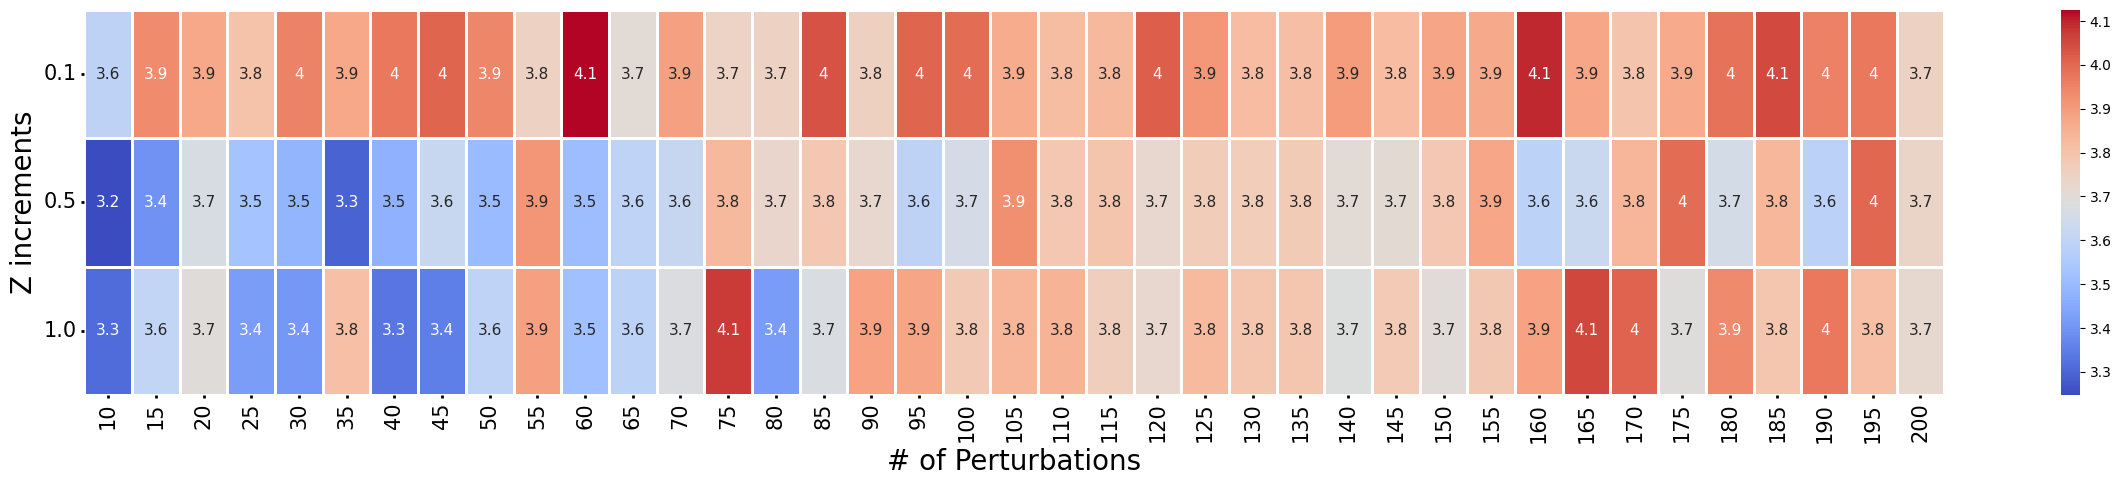

In [198]:
plt.rcParams['figure.figsize'] = 30,5

datamap = pd.pivot_table(data, index= "z_increment", columns="pert_num", values="Average_RMSD")
order=["10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90", "95", "100", "105", "110", "115", "120", "125", "130", "135", "140", "145", "150", "155", "160", "165", "170", "175", "180", "185", "190", "195", "200",]
datamap = datamap.reindex(order, axis=1)
sns.heatmap(datamap, annot=True, linewidth=2, cmap="coolwarm", annot_kws={"fontsize":11}, fmt='.2g')

plt.ylabel("Z increments", fontsize = 20)
plt.xlabel("# of Perturbations", fontsize = 20)
plt.tick_params(axis='x', labelsize='15', length=2, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='15', length=2, width=2, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/longheatmaplowest.png", format='png', transparent=True, bbox_inches='tight')